# Precipitation seasonality

First let's import necessary modules: <br>

In [1]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

Open and read a netCDF file.

In [ ]:
# Open a netCDF file
filename='trmm_mon_1998_2015.nc'
f1=Dataset(filename,'a')

Print variables in the file.

In [4]:
print (f1.variables.keys())

odict_keys(['time', 'longitude', 'latitude', 'pcp', 'err', 'weight'])


Let's check some of the variables. 

In [6]:
lat=f1.variables['latitude'][:]
lon=f1.variables['longitude'][:]
prcp=f1.variables['pcp'][:]*24.  # mm/hour to mm/day

Let's check the dimension of prcp.

In [7]:
print(prcp.shape)

(12, 400, 1440)


The dimensions are time, latitude and longitude.

Let's make a contour plot. We need a 2-D variable. So, let's make a plot for January precipitation.

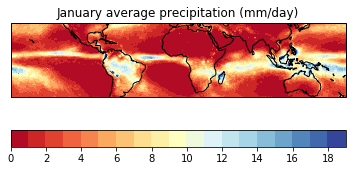

In [23]:
# color map
cmap1=plt.cm.RdYlBu

# map projection
proj = ccrs.PlateCarree()

# set contour levels
levels = np.arange(0,20,1)

# Make a plot
ax = plt.axes(projection=proj)
cs=ax.contourf(lon, lat, prcp[0,:,:],levels,
                transform=proj,
                cmap=cmap1)
ax.coastlines()
ax.set_extent([-180, 180, -40, 40]) # longitude latitude extent
plt.title('January average precipitation (mm/day)') #title
plt.colorbar(cs, orientation='horizontal') # color map

#### Exercise
Make a contour plot of July precipitation

#### Exercise
Make a contour plot of July - January precipitation

## Seasonal variation of precipitation
Let's calculate the zonal average of precipitation

In [8]:
prcp_lat=np.mean(prcp,axis=2)

Check the shape of the variable prcp_lat.

In [12]:
print(prcp_lat.shape)

(12, 400)


Let's create a variable mon.

In [16]:
mon=np.arange(12)+1  # From month 0 to 12

Create a contour plot of prcp_lat.

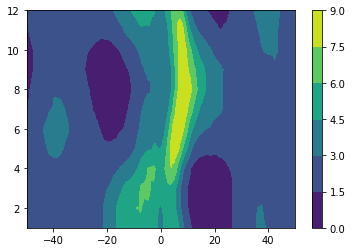

In [19]:
plt.contourf(lat,mon,prcp_lat) #lat is x-axis, mon is y-axis
plt.colorbar()

Let's make the plot prettier.

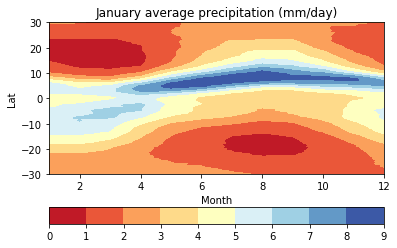

In [51]:
# set contour levels
levels = np.arange(0,10,1)
# color map
cmap1=plt.cm.RdYlBu

# Make a plot
ax = plt.axes()
cs=ax.contourf(mon,lat,prcp_lat.T,levels,  # Changed the axes
                cmap=cmap1)
plt.title('January average precipitation (mm/day)') #title
plt.xlabel('Month')
plt.ylabel('Lat')
plt.ylim(-30,30)
plt.colorbar(cs, orientation='horizontal') # color map

## Precipitation seasonality in Africa
Calculate and plot the zonal average of precipitation between -20E to 50E.

Let's first check how longitude is written.

In [28]:
print(lon)

[-179.875 -179.625 -179.375 ...  179.375  179.625  179.875]


It is from -180 to 180.
Let's find the closest points for 5W (-5) and 40E.

In [48]:
indx1=np.argmin((lon+5)**2)
indx2=np.argmin((lon-50)**2)
print(indx1,indx2)

699 919


Calculate the zonal average of precipitation between 5W (-5) to 50E.

In [49]:
prcp_africa=np.mean(prcp[:,:,indx1:indx2+1],axis=2)

Make a contour plot.

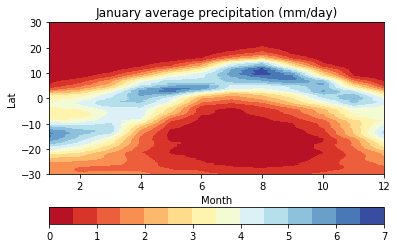

In [54]:
# set contour levels
levels = np.arange(0,7.5,0.5)
# color map
cmap1=plt.cm.RdYlBu

# Make a plot
ax = plt.axes()
cs=ax.contourf(mon,lat,prcp_africa.T,levels,  # Changed the axes
                cmap=cmap1)
plt.title('January average precipitation (mm/day)') #title
plt.xlabel('Month')
plt.ylabel('Lat')
plt.ylim(-30,30)
plt.colorbar(cs, orientation='horizontal') # color map

### Exercise
## Precipitation seasonality in Asia
Calculate and plot the zonal average of precipitation between 60E to 120E.

First, let's find the closest points for 60E and 120E.

Calculate average precipitation in Asia.

Make a contour plot.